In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('./MM.bmp')

image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

In [11]:
def exist_blue(image_hsv):
    # https://colorpicker.me/#e26d18
    lower_blue = np.array([100, 100, 120], dtype='uint8')
    upper_blue = np.array([124, 255, 255], dtype='uint8')
    
    mask = cv2.inRange(image_hsv, lower_blue, upper_blue)
    has_blue = np.any(mask > 0)
    image_blue = cv2.bitwise_and(image_hsv, image_hsv, mask=mask)
    image_blue = cv2.cvtColor(image_blue, cv2.COLOR_HSV2RGB)

    return has_blue, image_blue, mask

In [12]:
flag, image_blue, mask = exist_blue(image_hsv)

In [13]:
np.unique(mask, return_counts=True)

(array([  0, 255], dtype=uint8), array([396319,  89281]))

Existe MM Azul.


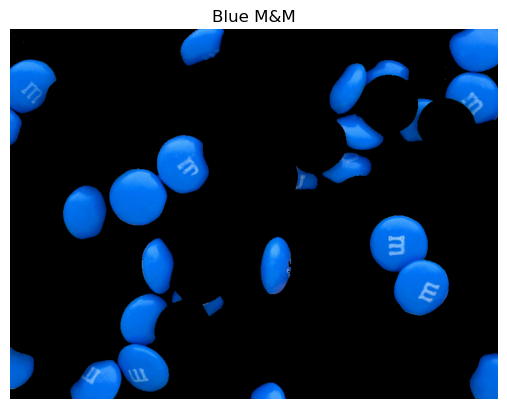

In [14]:
if flag:
    print("Existe MM Azul.")
else:
    print("Não existe MM Azul.")

plt.imshow(image_blue)
plt.title("Blue M&M")
plt.axis('off')
plt.show()

Claro, vamos analisar a questão de detectar se há M&M's vermelhos e laranjas na imagem, e se a solução seria fácil ou não.

Definição dos Intervalos de Cor: A primeira etapa envolve definir os intervalos de cor para vermelho e laranja no espaço de cor escolhido (RGB ou HSV, por exemplo). Esses intervalos precisam ser precisos o suficiente para capturar as tonalidades específicas dos M&M's, o que pode ser um pouco complicado, pois as cores podem variar ligeiramente dependendo da iluminação e da sombra na imagem.

Aplicação de Filtros de Cor: Em seguida, você aplicaria filtros de cor usando esses intervalos para identificar os pixels que correspondem ao vermelho e ao laranja. Este passo é realizado com funções como inRange no OpenCV.

Verificação da Presença de Ambas as Cores: Após a aplicação dos filtros, você verificará a imagem para ver se há pixels identificados como vermelhos e laranjas. Se ambas as cores estiverem presentes, a resposta à sua pergunta seria "sim".

Complexidade da Tarefa:

Simplicidade: A tarefa é relativamente direta em termos de passos a serem seguidos.
Desafios: A precisão na definição dos intervalos de cor é crítica. Cores como vermelho e laranja podem ter sobreposições no espectro visual, o que torna a tarefa de diferenciá-las com precisão mais desafiadora.
Iluminação e Sombra: Variações na iluminação e sombra na imagem podem alterar a aparência das cores, tornando a detecção mais complexa.
Falsos Positivos/Negativos: Existe sempre a possibilidade de falsos positivos ou negativos devido a limitações na definição de intervalos de cor e na qualidade da imagem.
Conclusão: Embora o processo em si não seja excessivamente complexo, a precisão na identificação das cores e a discriminação entre vermelho e laranja podem apresentar desafios. Assim, enquanto a solução é factível, a facilidade e a precisão dependerão muito das condições específicas da imagem e da precisão dos intervalos de cor definidos.







In [76]:
# Criar uma imagem em branco de tamanho 100x100 para cada cor

# lower_blue = np.array([110, 50, 50], dtype='uint8')

upper_blue = np.array([124, 255, 255], dtype='uint8')
lower_blue = np.array([114, 100, 100], dtype='uint8')

image_blue_min = np.full((100, 100, 3), lower_blue, dtype="uint8")
image_blue_max = np.full((100, 100, 3), upper_blue, dtype="uint8")

# Converter as imagens de HSV para RGB
image_blue_min_rgb = cv2.cvtColor(image_blue_min, cv2.COLOR_HSV2RGB)
image_blue_max_rgb = cv2.cvtColor(image_blue_max, cv2.COLOR_HSV2RGB)

# Salvar as imagens
blue_min_path = './blue_min_rgb.png'
blue_max_path = './blue_max_rgb.png'
cv2.imwrite(blue_min_path, cv2.cvtColor(image_blue_min_rgb, cv2.COLOR_RGB2BGR))
cv2.imwrite(blue_max_path, cv2.cvtColor(image_blue_max_rgb, cv2.COLOR_RGB2BGR))

blue_min_path, blue_max_path


('./blue_min_rgb.png', './blue_max_rgb.png')